# Data diri

Nama Lengkap : Achmad Noer Aziz

Lokasi Saat Ini : Pati, Jawa Tengah

## Load Dataset

In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O ./rockpaperscissors.zip

--2021-04-09 23:50:23--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘./rockpaperscissors.zip’

./rockpaperscissors 100%[===================>] 307.92M  8.54MB/s    in 46s     

2021-04-09 23:51:10 (6.65 MB/s) - ‘./rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
import zipfile
import os

local_zip = './rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()
 
base_dir = './rockpaperscissors'

In [3]:
!rm -rf "./rockpaperscissors/README_rpc-cv-images.txt"
!rm -rf "./rockpaperscissors/rps-cv-images"

In [4]:
!ls "./rockpaperscissors"

paper  rock  scissors


## Split Data

In [5]:
pip install split-folders

In [6]:
import splitfolders
!rm -rf './Datasets'

splitfolders.ratio('rockpaperscissors', output="Datasets", seed=42, ratio=(0.6, 0.4)) 

Copying files: 2188 files [00:00, 3961.43 files/s]


In [7]:
train_dir      = "./Datasets/train"
validation_dir = "./Datasets/val"

## Augmentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    zoom_range=0.1,
                    rotation_range=5,
                    horizontal_flip=True,
                    shear_range = 0.1,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    zoom_range=0.1,
                    rotation_range=5,
                    horizontal_flip=True,
                    shear_range = 0.1,
                    fill_mode = 'nearest')

In [9]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


## Create Model

In [10]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.applications.MobileNetV2(include_top = False, weights="imagenet", input_shape=(150, 150, 3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.layers[0].trainable = False

model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.RMSprop(learning_rate=0.0005), metrics=['accuracy'])

In [12]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', min_delta=0.0001, verbose=1, patience=3)

## Train Model

Epoch 1/50
15/15 [==============================] - 12s 597ms/step - loss: 1.2274 - accuracy: 0.4405 - val_loss: 0.6816 - val_accuracy: 0.7875
Epoch 2/50
15/15 [==============================] - 8s 528ms/step - loss: 0.5925 - accuracy: 0.7579 - val_loss: 0.3841 - val_accuracy: 0.9125
Epoch 3/50
15/15 [==============================] - 8s 530ms/step - loss: 0.4427 - accuracy: 0.8685 - val_loss: 0.2919 - val_accuracy: 0.9500
Epoch 4/50
15/15 [==============================] - 8s 530ms/step - loss: 0.2407 - accuracy: 0.9557 - val_loss: 0.2054 - val_accuracy: 0.9625
Epoch 5/50
15/15 [==============================] - 8s 528ms/step - loss: 0.2202 - accuracy: 0.9545 - val_loss: 0.2066 - val_accuracy: 0.9625
Epoch 6/50
15/15 [==============================] - 8s 521ms/step - loss: 0.1738 - accuracy: 0.9359 - val_loss: 0.1158 - val_accuracy: 0.9875
Epoch 7/50
15/15 [==============================] - 8s 525ms/step - loss: 0.1379 - accuracy: 0.9614 - val_loss: 0.1376 - val_accuracy: 0.9625
Epoch

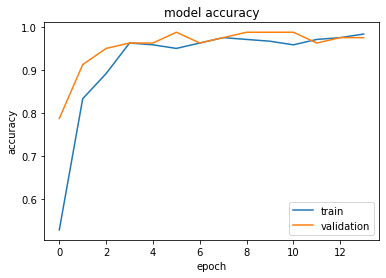

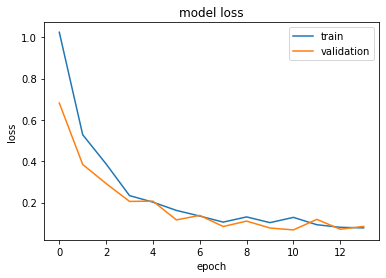

In [13]:
import matplotlib.pyplot as plt
import pytz
from datetime import datetime 
timeJKT = pytz.timezone('Asia/Jakarta') 

start_train = datetime.now(timeJKT)
history = model.fit(
      train_generator,
      validation_data=validation_generator,
      epochs=50,
      steps_per_epoch=15,
      validation_steps=5,
      callbacks=[es],
      verbose=1)
end_train = datetime.now(timeJKT)
train_time = end_train - start_train
print("\n[INFO] Training Duration: %ss"%int(train_time.total_seconds()))
print("[INFO] Train Accuracy:", "{:.5f}%".format(history.history['accuracy'][-1]*100))
print("[INFO] Train Loss    :", "{:.7f}".format(history.history['loss'][-1]))
print("[INFO] Val Accuracy  :", "{:.5f}%".format(history.history['val_accuracy'][-1]*100))
print("[INFO] Val Loss      :", "{:.7f}".format(history.history['val_loss'][-1]))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Testing

In [14]:
def testing(image_for_test):
  size_img = 150,150
  
  image_for_test = cv2.resize(image_for_test, size_img)
  arr_img = image.img_to_array(image_for_test)
  arr_img = np.expand_dims(arr_img, axis=0)
  pred_images = np.vstack([arr_img])
  classes = model.predict(pred_images)
  classes = np.argmax(classes)
  return classes

Saving scissors.png to scissors.png


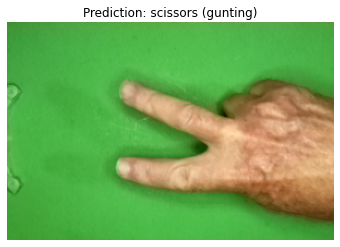

In [15]:
import cv2
import numpy as np
from google.colab import files
from keras.preprocessing import image

labels_dict = {0:'paper (kertas)', 1:'rock (batu)', 2:'scissors (gunting)'}

imgupload = files.upload()
keys = list(imgupload.keys())

imgupload = cv2.imread(keys[0])
imgupload = cv2.cvtColor(imgupload, cv2.COLOR_BGR2RGB)
imgupload = imgupload.astype('float32')/255.0

pred_result = testing(imgupload)
pred_result = labels_dict[pred_result]

plt.axis('off')
plt.title("Prediction: " + pred_result)
plt.imshow(imgupload)
plt.show()